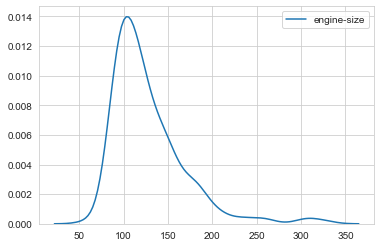

In [1]:
# Let's Load the Automobile Price data set first
#To do so I'll import the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
%matplotlib inline


def read_auto_data(fileName = "C:/Users/Abhishek Nagrecha/Desktop/Data_visualization/Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 


    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
#    auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()
import seaborn as sns
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['engine-size'])

In [2]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Text(0, 0.5, 'Density')

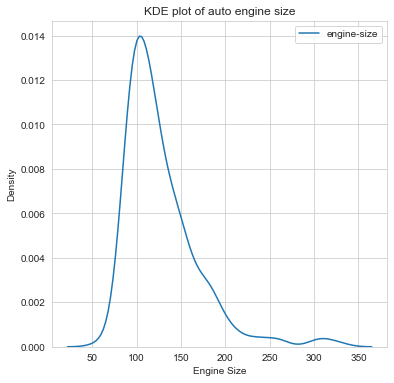

In [3]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['engine-size'], ax = ax)
ax.set_title('KDE plot of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine Size') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

Text(0, 0.5, 'Density')

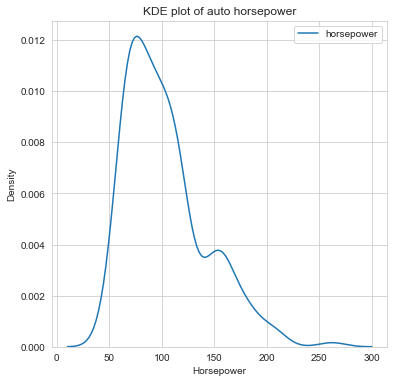

In [4]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['horsepower'], ax = ax)
ax.set_title('KDE plot of auto horsepower') # Give the plot a main title
ax.set_xlabel('Horsepower') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

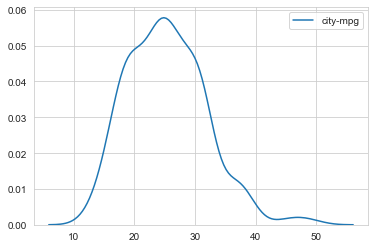

In [5]:
#KDE plots
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['city-mpg'])

C:\Users\Abhishek Nagrecha\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Price')

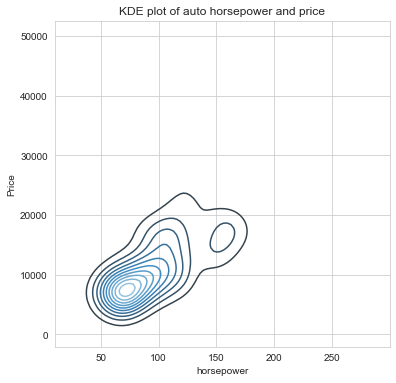

In [6]:
#2d KDE plot


fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices[['horsepower', 'price']], ax = ax, cmap="Blues_d")
ax.set_title('KDE plot of auto horsepower and price') # Give the plot a main title
ax.set_xlabel('horsepower') # Set text for the x axis
ax.set_ylabel('Price')# Set text for y axis

# violin plots

Text(0, 0.5, 'Engine size')

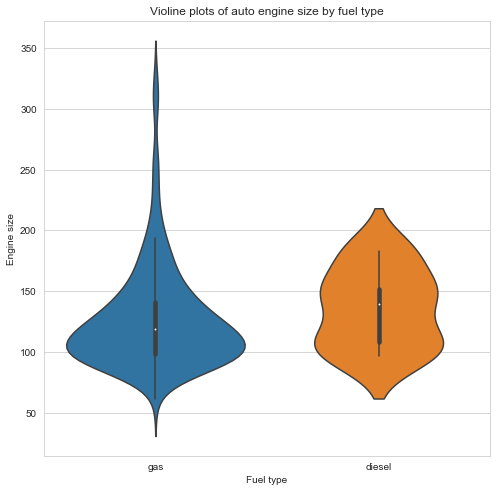

In [7]:
#iolin plot combines attributes of boxplots and a kernel density estimation plot

fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'fuel-type', y = 'engine-size', data = auto_prices, ax = ax)
ax.set_title('Violine plots of auto engine size by fuel type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

#its clearly observable that the distibution of diesel engine sizes is more uniform with less outliers

Text(0, 0.5, 'highway-mpg')

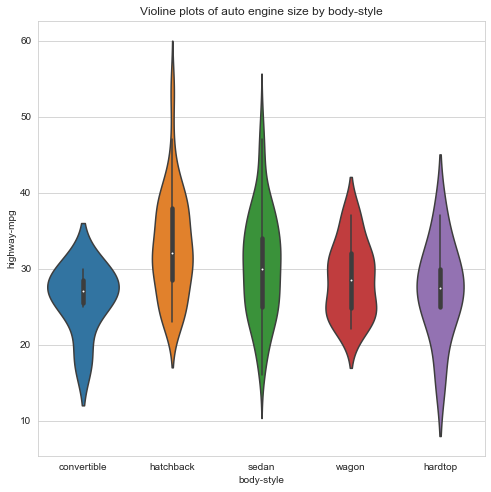

In [8]:
#iolin plot combines attributes of boxplots and a kernel density estimation plot

fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'body-style', y = 'highway-mpg', data = auto_prices, ax = ax)
ax.set_title('Violine plots of auto engine size by body-style') # Give the plot a main title
ax.set_xlabel('body-style') # Set text for the x axis
ax.set_ylabel('highway-mpg')# Set text for y axis

#Here we can see that wagon auto are quite uniformly distributed whereas there are
#some hardtop and sedan cars have vey low highway-mpg
#Also few hetchback cars have very high highway-mpg

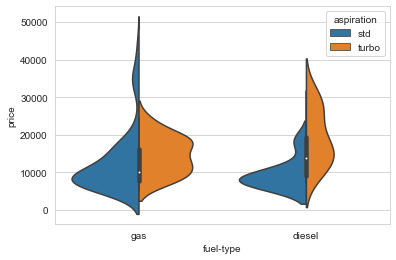

In [9]:
#Now we will explore the Split violin plot

import seaborn as sns
sns.set_style("whitegrid")
sns.violinplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="aspiration",  split=True)

#its observable that std gas autos are having highest price range.

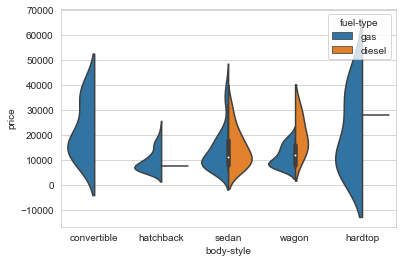

In [10]:
import seaborn as sns
sns.set_style("whitegrid")
sns.violinplot(data = auto_prices, x = 'body-style', y = 'price', hue="fuel-type",  split=True)

#its very interesting to observe that only wagon and sedan body-style has diesel models.
#and hetchback being the least expensive among all types.
#there must beexactly 2 hue levels to use this split.

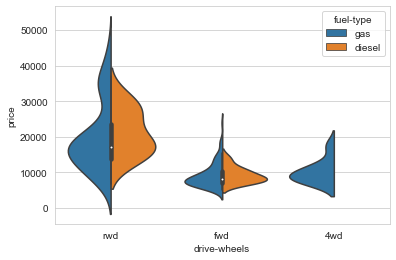

In [12]:

sns.set_style("whitegrid")
sns.violinplot(data = auto_prices, x = 'drive-wheels', y = 'price', hue="fuel-type",  split=True)